In [ ]:
# Архив Baseline: https://ftp.ncbi.nlm.nih.gov/pubmed/baseline/
# Aрхив Daily Updates: https://ftp.ncbi.nlm.nih.gov/pubmed/updatefiles/

# Загрузим экземпляр для примера
!curl -O https://ftp.ncbi.nlm.nih.gov/pubmed/baseline/pubmed24n1219.xml.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   992    0   992    0     0   1213      0 --:--:-- --:--:-- --:--:--  1214


In [2]:
import pubmed_parser as pp
import pandas as pd
import scispacy
import spacy
import matplotlib.pyplot as plt

In [3]:
dicts_out = pp.parse_medline_xml('pubmed24n1219.xml.gz')

In [4]:
df = pd.DataFrame(dicts_out)

BadGzipFile: Not a gzipped file (b'<?')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15432 entries, 0 to 15431
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   title              15432 non-null  object
 1   issue              15432 non-null  object
 2   pages              15432 non-null  object
 3   abstract           15432 non-null  object
 4   journal            15432 non-null  object
 5   authors            15432 non-null  object
 6   pubdate            15432 non-null  object
 7   pmid               15432 non-null  object
 8   mesh_terms         15432 non-null  object
 9   publication_types  15432 non-null  object
 10  chemical_list      15432 non-null  object
 11  keywords           15432 non-null  object
 12  doi                15432 non-null  object
 13  references         15432 non-null  object
 14  delete             15432 non-null  bool  
 15  languages          15432 non-null  object
 16  vernacular_title   15432 non-null  objec

In [ ]:
df.columns

Index(['title', 'issue', 'pages', 'abstract', 'journal', 'authors', 'pubdate',
       'pmid', 'mesh_terms', 'publication_types', 'chemical_list', 'keywords',
       'doi', 'references', 'delete', 'languages', 'vernacular_title',
       'affiliations', 'pmc', 'other_id', 'medline_ta', 'nlm_unique_id',
       'issn_linking', 'country', 'grant_ids'],
      dtype='object')

In [ ]:
df1 = df[df['abstract'] != ''][['title', 'authors','abstract', 'journal', 'country', 'pmid', 'pubdate']]
# Выведем некоторые метаданные для первых 5 записей попавших в файл с непустым abstract
df1[:5]

,title,authors,abstract,journal,country,pmid,pubdate
0,GRP94 in cerebrospinal fluid may contribute to...,Liu|Kaige|K|;Qu|Yue|Y|;Li|Bozhi|B|;Zeng|Ningxi...,The present study was designed to investigate ...,Journal of psychiatric research,England,38081093,2023
1,The application of ferritin in transporting an...,Wu|Jincan|J|;Li|Yue|Y|;Wu|Huimin|H|;Zhang|Haot...,The ferritin cage can not only load iron ions ...,Food chemistry,England,38081094,2023
2,Design and characterization of tannic acid/ε-p...,Yong|Yueyuan|Y|;Gu|Yingying|Y|;Nabeel Ahmad|Ha...,The shelf life of beef is shortened by microbi...,Food chemistry,England,38081095,2023
3,"A comprehensive ""quality-quantity-activity"" ap...",Zou|Ziwei|Z|;Guo|Bingjian|B|;Guo|Yue|Y|;Ma|Xia...,Spices have long been popular worldwide. Besid...,Food chemistry,England,38081096,2023
4,A novel colorimetric and fluorometric dual-sig...,Qiao|Cailin|C|;Wang|Xinrou|X|;Gao|Yuwei|Y|;Li|...,Nanozymes were nanomaterials with enzymatic pr...,Food chemistry,England,38081097,2023


In [ ]:
# Выведем abstract для первой записи из набора
df['abstract'][0]

'The present study was designed to investigate potential biomarkers of depression and targets of antidepressants from the perspective of hippocampal endoplasmic reticulum stress (ERS) based on cerebrospinal fluid (CSF) proteomics. Firstly, a six-week depression model was established and treated with fluoxetine (FLX). We found antidepressant-FLX could ameliorate depression-like behaviors and cognition in depressed rats caused by chronic unpredictable mild stress (CUMS). FLX significantly increased neuronal numbers in dentate gyrus (DG) and CA3 regions of hippocampus. CSF proteome data revealed thirty-seven differentially expressed proteins (DEPs) co-regulated by CUMS and FLX, including GRP94 and EIF2α. Results of Gene Oncology (GO) annotation and KEGG pathway enrichment for DEPs mainly included PERK-mediated unfolded protein response, endoplasmic reticulum, and translational initiation. The expression levels of GRP94, p-PERK, p-EIF2α, CHOP and Caspase-12 were increased in hippocampus of

In [ ]:
df['country'].unique()

array(['England', 'United States', 'Netherlands', 'Germany', 'Ireland',
       'Denmark', 'Switzerland', 'France', 'Japan', 'Korea (South)',
       'Brazil', 'China', 'Scotland', 'Belgium', 'Canada', 'Spain',
       'Australia', 'Austria', 'Italy', 'New Zealand', 'India',
       'United Arab Emirates', 'Pakistan', 'Singapore', 'Turkey',
       'Poland', 'Czech Republic', 'Sweden', 'Serbia', 'Norway', 'Iran',
       'Nigeria', 'Greece', 'Egypt', 'Bangladesh', 'Russia (Federation)',
       'China (Republic : 1949- )', 'Finland', 'Saudi Arabia', 'Qatar',
       'South Africa', 'Colombia', 'Peru', 'Oman', 'Hungary', 'Chile',
       'Bulgaria', 'Bosnia and Herzegovina', 'Mexico',
       'Georgia (Republic)'], dtype=object)

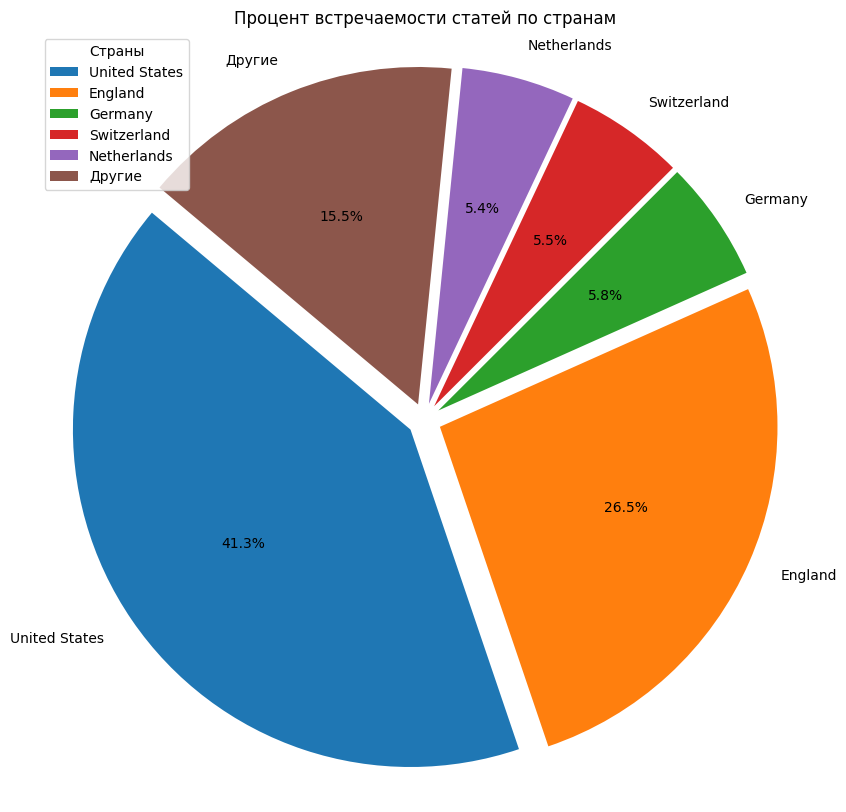

In [ ]:
#Подсчитываем количество статей по странам
country_counts = df['country'].value_counts()

#Берем топ-10 стран
top_countries = country_counts.head(5)

#Суммируем остальные страны
other_count = country_counts.iloc[5:].sum()
top_countries = pd.concat([top_countries, pd.Series({'Другие': other_count})])

#Создаем круговую диаграмму
plt.figure(figsize=(10,10))
plt.pie(top_countries, labels=top_countries.index, autopct='%1.1f%%', startangle=140, explode=[0.05]*len(top_countries))
plt.title('Процент встречаемости статей по странам')
plt.legend(top_countries.index, title="Страны", loc="best")
plt.axis('equal')  # Равные оси для круговой формы
plt.show()

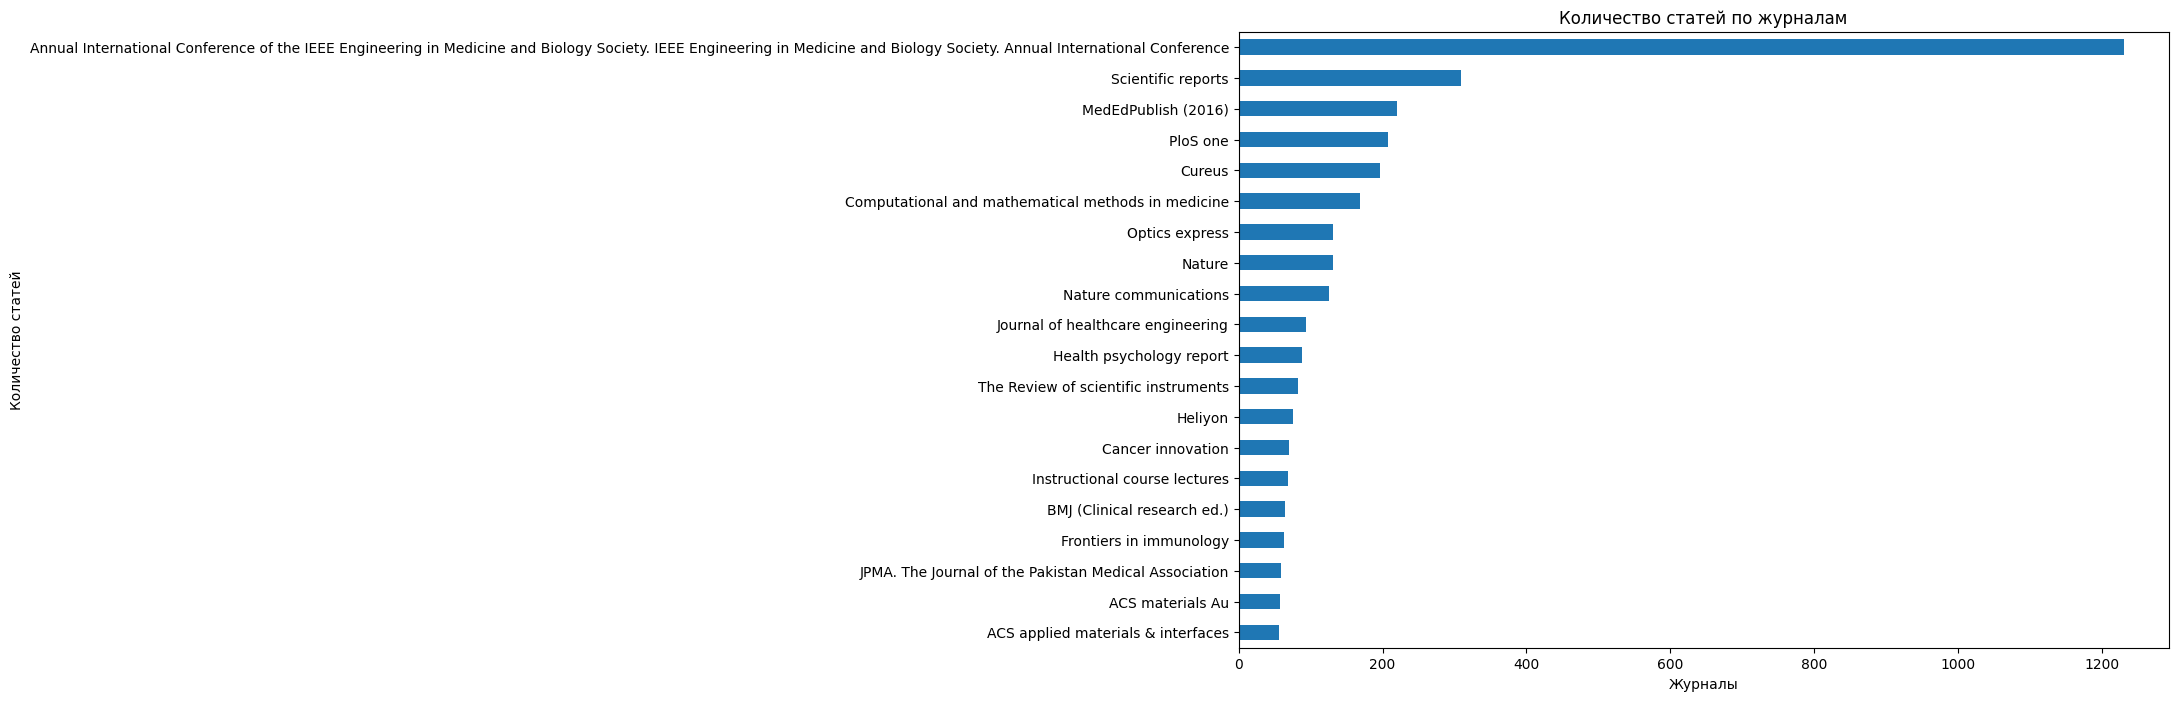

In [ ]:
# Подсчитаем количество статей для каждого журнала
journal_counts = df['journal'].value_counts()

# Возьмем топ-20 журналов для наглядности
top_journals = journal_counts.head(20)

# Построим график
plt.figure(figsize=(12, 8))
top_journals.plot(kind='barh')
plt.title('Количество статей по журналам')
plt.xlabel('Журналы')
plt.ylabel('Количество статей')
plt.gca().invert_yaxis()
plt.show()

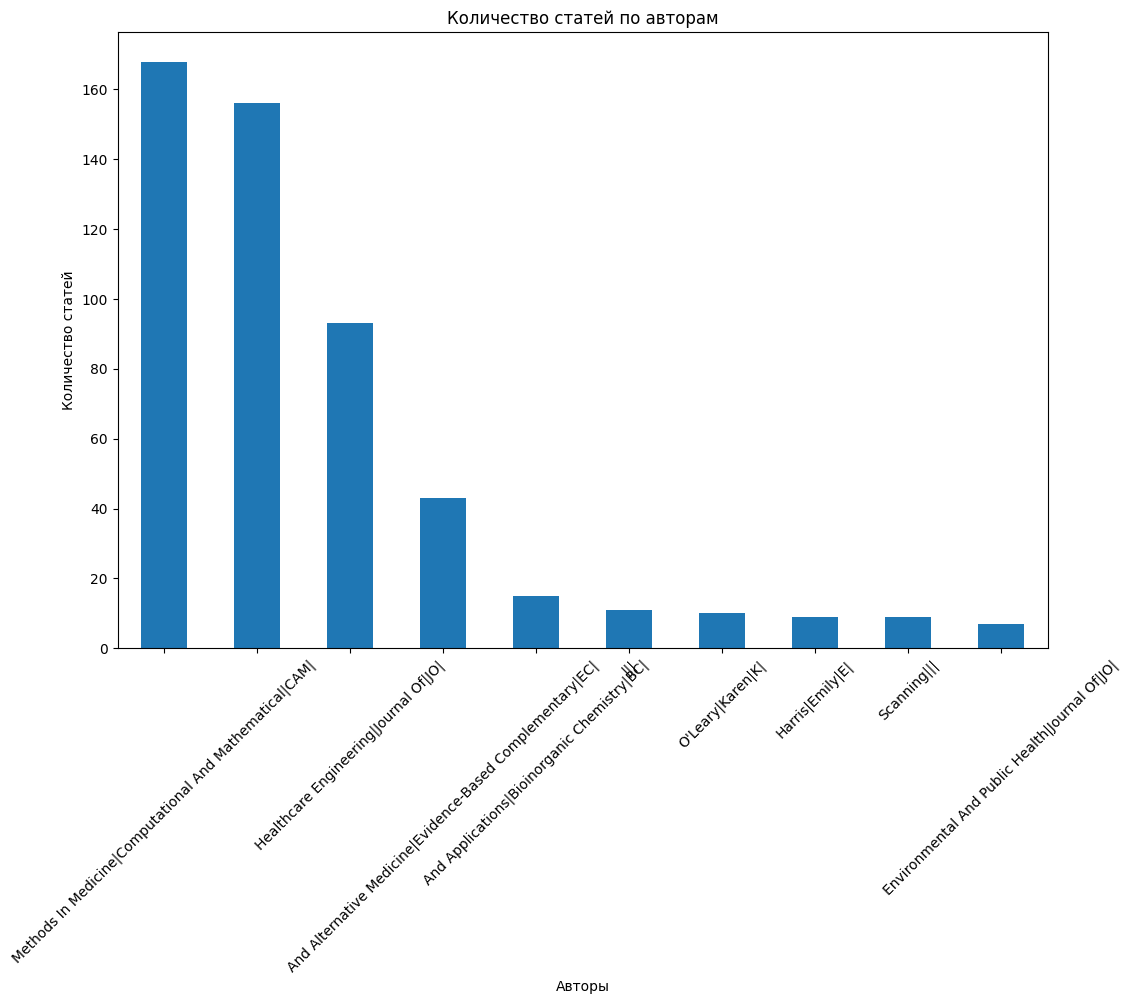

In [ ]:
author_counts = df['authors'].value_counts().head(10)
plt.figure(figsize=(12, 8))
author_counts.plot(kind='bar')
plt.title('Количество статей по авторам')
plt.xlabel('Авторы')
plt.ylabel('Количество статей')
plt.xticks(rotation=45)
plt.show()

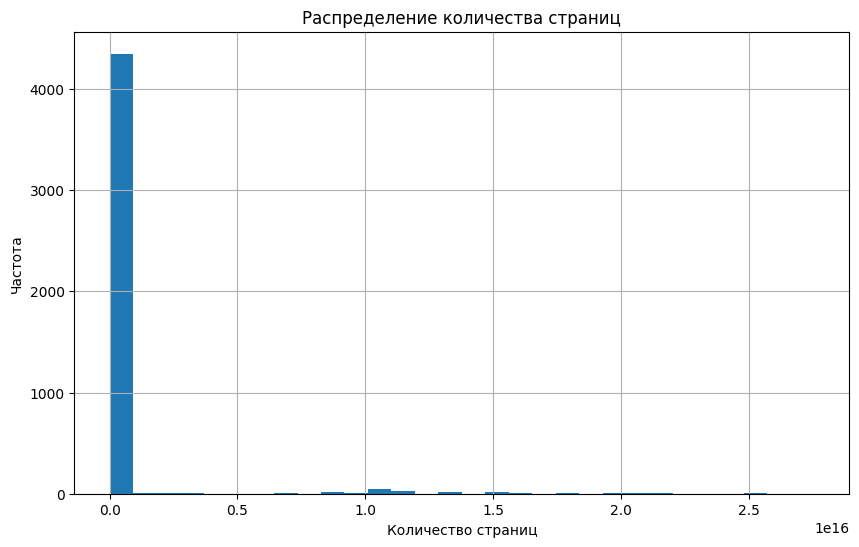

In [ ]:
df['pages'] = df['pages'].apply(pd.to_numeric, errors='coerce')  # Преобразование в числовой формат, если необходимо
plt.figure(figsize=(10, 6))
df['pages'].dropna().hist(bins=30)
plt.title('Распределение количества страниц')
plt.xlabel('Количество страниц')
plt.ylabel('Частота')
plt.show()

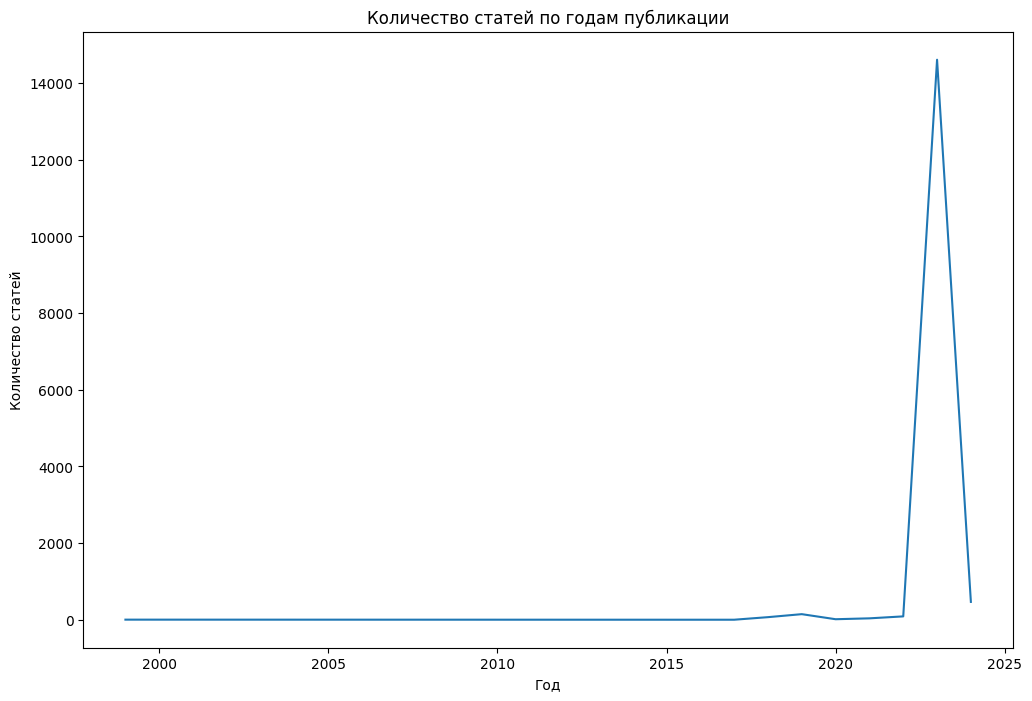

In [ ]:
df['pubdate'] = pd.to_datetime(df['pubdate'], errors='coerce')
df['year'] = df['pubdate'].dt.year
yearly_counts = df['year'].value_counts().sort_index()
plt.figure(figsize=(12, 8))
yearly_counts.plot(kind='line')
plt.title('Количество статей по годам публикации')
plt.xlabel('Год')
plt.ylabel('Количество статей')
plt.show()

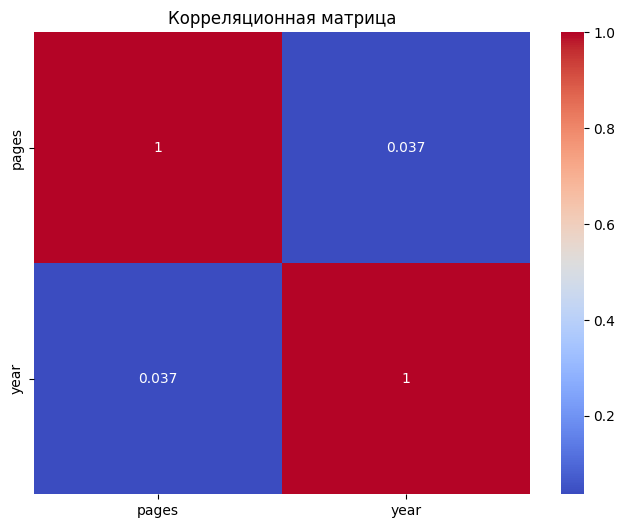

In [ ]:
import seaborn as sns

numerical_df = df[['pages', 'year']].dropna().apply(pd.to_numeric, errors='coerce')
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

### Дашборд